# Neural Networks - Architecture

This notebook introduces to Artificial Neural Networks

Vannila Neural Network is a supervised technique which can be used both for classification and regression. 

![title](https://i0.wp.com/www.takethiscourse.net/wp-content/uploads/2019/06/Neural-Networks-and-Deep-Learning.png?fit=1318%2C862&ssl=1)

Each circle is a neuron, which can get and/or give data. Each arrow is a **weight** how strongly the connection is between neurons. The data comes in to input layer and is propogated forward to hidden layers. Then each hidden layer propogates the data it received to next layers until data reaches to the output layer, from which we already use the data of it for our needs

So now let's see ho each neuron receives data. Each input to a neuron has it's weight (steength of connection). Each input is multiplied by its weight and the sum of all weighted inputs is propogated to the next layers neuron. Aftwardes an **activation function** is applied to the sum and is propogated to thex layers neurons.

One of the most popular activation functions is the sigmoid function which we got familiar from logistic regression.

$$\LARGE{f(x) =\frac{1}{1 + e^{-x}}}$$

![title](https://advise.eecs.wsu.edu/wp-content/uploads/2019/09/james2.png)

![title](http://i.imgur.com/UNlffE1.png)

Neural Network construction
https://stevenmiller888.github.io/mind-how-to-build-a-neural-network/

Other popular activation functions.
$$\text{Hyperbolic Tangent}\quad\large{tanh(x) =\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}} = \frac{e^{2x} - 1}{e^{2x} + 1} $$<br>
$$\text{Rectified Linear Unit}\quad\large{ReLU(x) = max(0,x)}$$<br>
$$\text{Softmax}\quad\large{softmax(x)_{i} =\frac{e^{x_i}}{\sum\limits_{j=1}^N{e^{x_j}}}}\quad\text{for i from 1,...,N}$$<br>

![Activation](https://www.kdnuggets.com/wp-content/uploads/activation.png)

Besides _weigths_ there are also _bias_ terms. Biases are responsible for the location of the mean of output of a neuron. To get mean different from 0 you need to use biases.

![titles](http://m.shianwang.com/img/aHR0cDovL2ltZzMuaW1ndG4uYmRpbWcuY29tL2l0L3U9MzcxNjY5MzE3NywzNjAzMjgzMzEwJmZtPTI2JmdwPTAuanBn.jpg)

NNs are inspired from human brain neurons, but they are quite different in many aspects. One of which is 2 given neurons don't necceserailly have one connection, and one neuron can do multiple thigns even take other neuron's job on its shoulders, while artificial neural networks don't have that capability.

![title](https://d35fo82fjcw0y8.cloudfront.net/2019/04/08023413/Neural_Network_Brain_Mimic.jpeg)

Now let's go to some practical examples.

Fun interface to generate NN architectures http://alexlenail.me/NN-SVG/index.html

In [1]:
import keras
from keras.layers import Dense,Input
from keras import Model
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


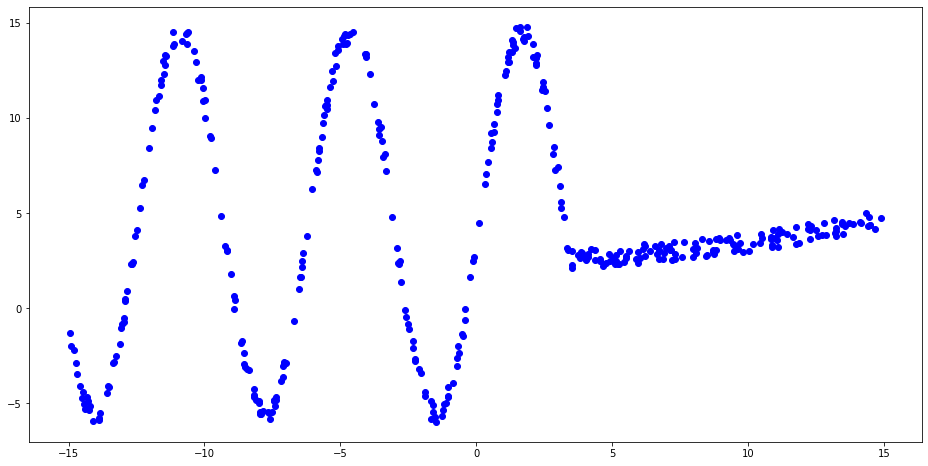

In [2]:
# Generate random data
X = 30*np.random.random(400)-15
Y = np.array([1/100*(x-0.1)**2 +np.random.random(1)+2 if x>3.5 else 10*np.sin(x-0.1) +np.random.random(1)+4 for x in X])
# Plot data
plt.figure(figsize = (16,8))
plt.plot(X,Y,'bo')
plt.show()

In [3]:
# NN architecture
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
h1 = Dense(6,activation='sigmoid', name = 'hidden_layer1')(input_layer) # hidden layer 1
h2 = Dense(6,activation='sigmoid', name = 'hidden_layer2')(h1) # hidden layer 2
h3 = Dense(6,activation='sigmoid', name = 'hidden_layer3')(h2) # hidden layer 3
output = Dense(1, name = 'output_layer')(h3)

model = Model(input_layer,output)
model.compile(optimizer='adam',loss = 'mse')

In [4]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 1)                 0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 6)                 12        
_________________________________________________________________
hidden_layer2 (Dense)        (None, 6)                 42        
_________________________________________________________________
hidden_layer3 (Dense)        (None, 6)                 42        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_params = {l.name:{} for l in model.layers}
model_params[model.layers[0].name] = model.layers[0].get_weights()
for l in model.layers[1:]:
    model_params[l.name]['weigths'] = l.get_weights()[0]
    model_params[l.name]['biases'] = l.get_weights()[-1]

In [0]:
def plot_model():
    plt.plot(X,Y,'bo')
    plt.plot(X,model.predict(X),'ro')
    plt.show()

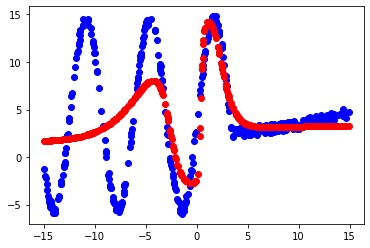

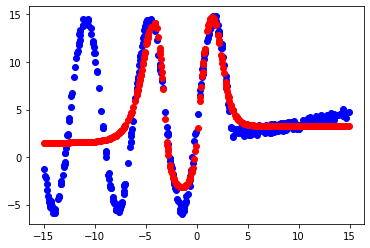

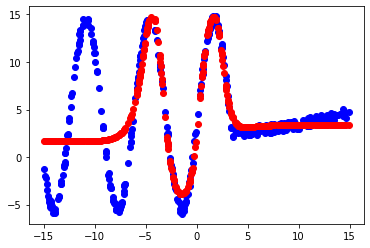

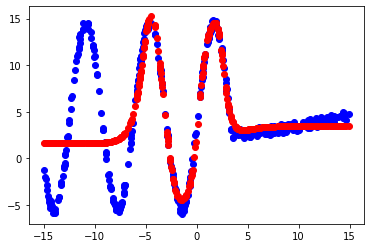

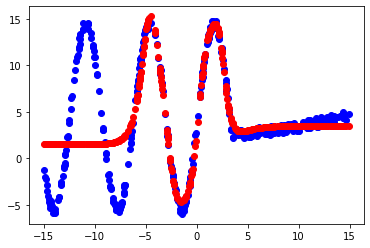

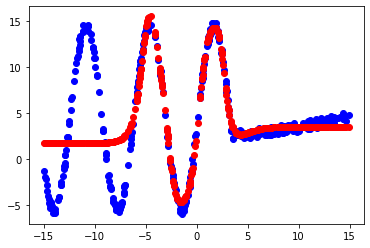

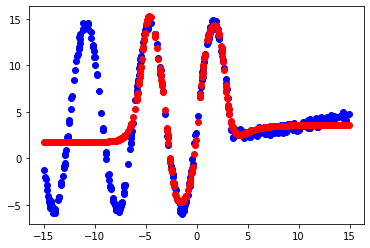

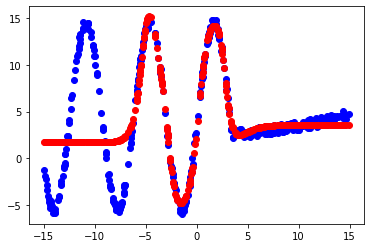

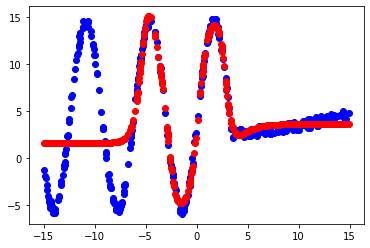

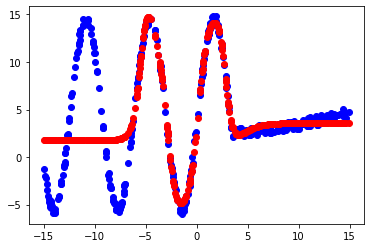

In [7]:
for i in range(10):
    model.fit(X,Y,epochs=1000,verbose = 0)
    plot_model()

In [0]:
# construct part of network to visualize hidden layers
input_layer_1 = Input(shape = (1,)) # input layer
h1_1 = Dense(6,activation='sigmoid', weights = model.layers[1].get_weights())(input_layer_1) # hidden layer 1

model_1 = Model(input_layer_1,h1_1)
model_1.compile(optimizer='adam',loss = 'mse')

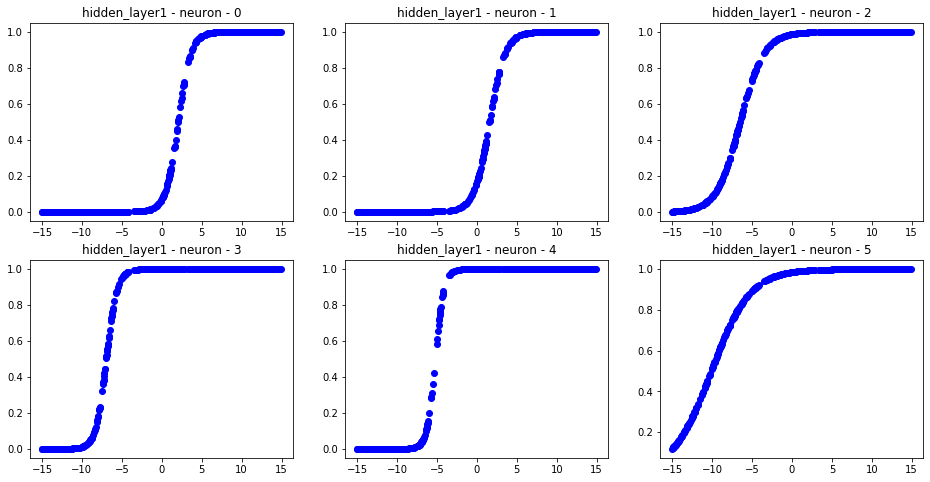

In [0]:
fig,ax = plt.subplots(2,3,figsize = (16,8))
for i in range(6):
    ax[int(i>=3),i%3].plot(X,model_1.predict(X)[:,i],'bo')
    ax[int(i>=3),i%3].set_title('hidden_layer1'+' - neuron - ' + str(i))
plt.show()

In [0]:
# construct part of network to visualize hidden layers
input_layer_2 = Input(shape = (1,)) # input layer
h1_2 = Dense(6,activation='sigmoid', weights = model.layers[1].get_weights())(input_layer_2) # hidden layer 1
h2_2 = Dense(6,activation='sigmoid', weights = model.layers[2].get_weights())(h1_2) # hidden layer 2

model_2 = Model(input_layer_2,h2_2)
model_2.compile(optimizer='adam',loss = 'mse')

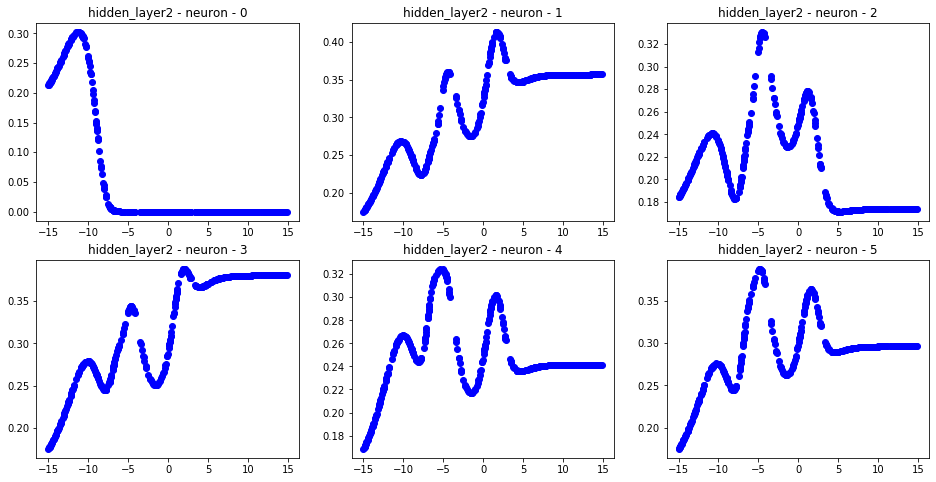

In [0]:
fig,ax = plt.subplots(2,3,figsize = (16,8))
for i in range(6):
    ax[int(i>=3),i%3].plot(X,model_2.predict(X)[:,i],'bo')
    ax[int(i>=3),i%3].set_title('hidden_layer2'+' - neuron - ' + str(i))
plt.show()

Now lets what happens to second hidden layer when we remove biases.

In [0]:
# NN architecture
input_layer = Input(shape = (1,), name = 'input_layer') # input layer
h1 = Dense(6,activation='sigmoid', name = 'hidden_layer1',use_bias=False)(input_layer) # hidden layer 1
h2 = Dense(6,activation='sigmoid', name = 'hidden_layer2',use_bias=False)(h1) # hidden layer 2
h3 = Dense(6,activation='sigmoid', name = 'hidden_layer3',use_bias=False)(h2) # hidden layer 2
output = Dense(1, name = 'output_layer',use_bias = False)(h3)

model = Model(input_layer,output)
model.compile(optimizer='adam',loss = 'mse')

Epoch 1/10000
400/400 [==============================] - 1s 2ms/step - loss: 47.9846
Epoch 2/10000
400/400 [==============================] - 0s 62us/step - loss: 47.3866
Epoch 3/10000
400/400 [==============================] - 0s 53us/step - loss: 46.7776
Epoch 4/10000
400/400 [==============================] - 0s 56us/step - loss: 46.2227
Epoch 5/10000
400/400 [==============================] - 0s 72us/step - loss: 45.6734
Epoch 6/10000
400/400 [==============================] - 0s 53us/step - loss: 45.1528
Epoch 7/10000
400/400 [==============================] - 0s 52us/step - loss: 44.6450
Epoch 8/10000
400/400 [==============================] - 0s 68us/step - loss: 44.1493
Epoch 9/10000
400/400 [==============================] - 0s 74us/step - loss: 43.6654
Epoch 10/10000
400/400 [==============================] - 0s 55us/step - loss: 43.2005
Epoch 11/10000
400/400 [==============================] - 0s 56us/step - loss: 42.7375
Epoch 12/10000
400/400 [=============================

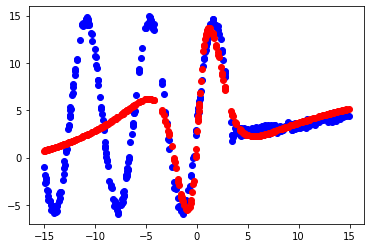

In [0]:
model.fit(X,Y,epochs=10_000,verbose = 1)
plot_model()

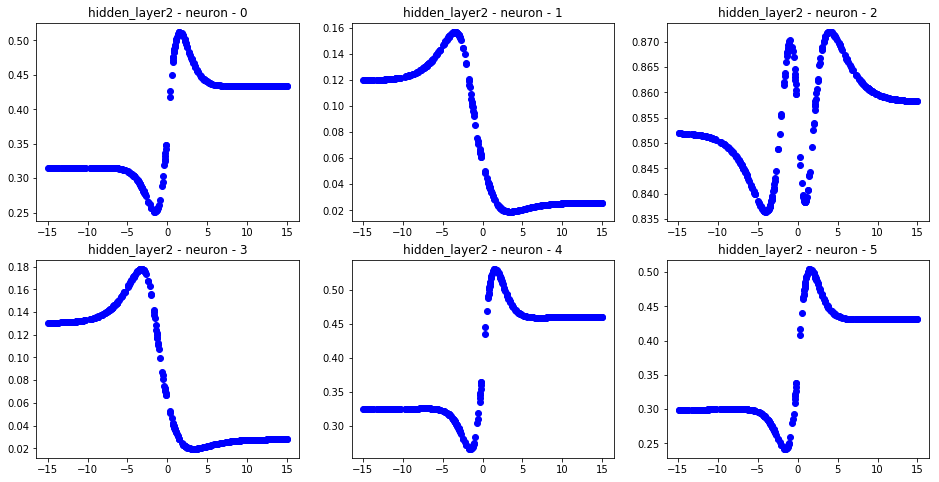

In [0]:
# construct part of netwrok to visualize hidden layers
input_layer_2 = Input(shape = (1,)) # input layer
h1_2 = Dense(6,activation='sigmoid', weights = model.layers[1].get_weights(),use_bias = False)(input_layer_2) # hidden layer 1
h2_2 = Dense(6,activation='sigmoid', weights = model.layers[2].get_weights(),use_bias = False)(h1_2) # hidden layer 2

model_2 = Model(input_layer_2,h2_2)
model_2.compile(optimizer='adam',loss = 'mse')

fig,ax = plt.subplots(2,3,figsize = (16,8))
for i in range(6):
    ax[int(i>=3),i%3].plot(X,model_2.predict(X)[:,i],'bo')
    ax[int(i>=3),i%3].set_title('hidden_layer2'+' - neuron - ' + str(i))
plt.show()

All outputs have 0 mean, i.e. we cannot change the location without biases. 

Nice playground for understanding NNs. https://playground.tensorflow.org

Visualization of N http://www.cs.cmu.edu/~aharley/vis/fc